In [1]:
#get tsmc 2330 stock pip install pandas-datareader yfinance
!pip install pandas_datareader
!pip install yfinance

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web # 導入web套件讀取網站資料
import yfinance #import yahoo_finance
import numpy as np
import datetime

start = "2019-7-1"  #start = datetime.datetime(2019,1,1)
end = datetime.date.today()
tsmc = web.get_data_yahoo("2330.tw",start,end) # 使用web套件讀取yahoo網站股票代號為2330的資料,依照起迄日期
tsmc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-01,250.0,245.0,245.5,248.5,66307875.0,237.117493
2019-07-02,250.0,247.5,249.5,249.0,24181202.0,237.594574
2019-07-03,245.0,242.0,244.0,242.5,29449774.0,231.392288
2019-07-04,245.0,242.5,244.5,244.0,17481240.0,232.823593
2019-07-05,245.0,241.5,244.5,243.0,22867074.0,231.869400
...,...,...,...,...,...,...
2021-06-02,600.0,593.0,600.0,595.0,21872755.0,595.000000
2021-06-03,600.0,596.0,600.0,596.0,21077164.0,596.000000
2021-06-04,595.0,590.0,591.0,595.0,15756180.0,595.000000


In [2]:
#周線 5days / 月線 20days /季線 60days / 半年線?　年線？　
tsmc["5d"] = np.round(tsmc["Adj Close"].rolling(window =5, center = False).mean(),2)
tsmc["20d"] = np.round(tsmc["Adj Close"].rolling(window =20, center = False).mean(),2)
tsmc["60d"] = np.round(tsmc["Adj Close"].rolling(window =60, center = False).mean(),2)
tsmc["LBBand"] = tsmc["20d"] - 2*np.round(tsmc["Adj Close"].rolling(window =20, center = False).std(),2)
tsmc["UBBand"] =  tsmc["20d"] + 2*np.round(tsmc["Adj Close"].rolling(window =20, center = False).std(),2)

In [3]:
tsmc.loc[start:end,:] #完整的資料

,High,Low,Open,Close,Volume,Adj Close,5d,20d,60d,LBBand,UBBand
Date,,,,,,,,,,,
2019-07-01,250.0,245.0,245.5,248.5,66307875.0,237.117493,NaN,NaN,NaN,NaN,NaN
2019-07-02,250.0,247.5,249.5,249.0,24181202.0,237.594574,NaN,NaN,NaN,NaN,NaN
2019-07-03,245.0,242.0,244.0,242.5,29449774.0,231.392288,NaN,NaN,NaN,NaN,NaN
2019-07-04,245.0,242.5,244.5,244.0,17481240.0,232.823593,NaN,NaN,NaN,NaN,NaN
2019-07-05,245.0,241.5,244.5,243.0,22867074.0,231.869400,234.16,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-02,600.0,593.0,600.0,595.0,21872755.0,595.000000,592.40,576.80,592.07,544.62,608.98
2021-06-03,600.0,596.0,600.0,596.0,21077164.0,596.000000,595.20,577.25,592.03,544.23,610.27
2021-06-04,595.0,590.0,591.0,595.0,15756180.0,595.000000,596.20,577.05,592.02,544.55,609.55


In [4]:
tsmc.index

DatetimeIndex(['2019-07-01', '2019-07-02', '2019-07-03', '2019-07-04',
               '2019-07-05', '2019-07-08', '2019-07-09', '2019-07-10',
               '2019-07-11', '2019-07-12',
               ...
               '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-31',
               '2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
               '2021-06-07', '2021-06-08'],
              dtype='datetime64[ns]', name='Date', length=471, freq=None)

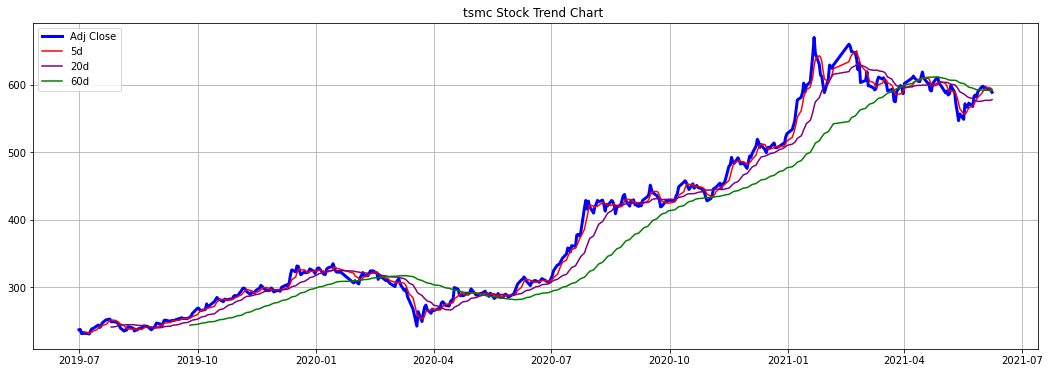

In [5]:
#日線/周線/月線/季線 

%matplotlib inline

plt.figure(figsize=(18,6))# Change the size of plots
plt.plot( tsmc["Adj Close"], color='blue' ,linewidth=3 ,label="Adj Close"  )
plt.plot( tsmc["5d"], color='red',label="5d"   )
plt.plot( tsmc["20d"], color='purple' ,label="20d"  )
plt.plot( tsmc["60d"], color='green' ,label="60d"  )

plt.title('tsmc Stock Trend Chart ')
plt.legend(loc='upper left')
plt.grid()
plt.show()


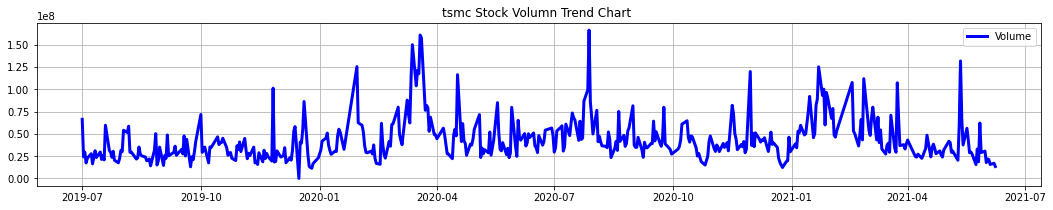

In [6]:
# Volume
%matplotlib inline
plt.figure(figsize=(18,3))# Change the size of plots
plt.plot( tsmc["Volume"], color='blue' ,linewidth=3 ,label="Volume"  )
plt.title('tsmc Stock Volumn Trend Chart ')
plt.legend(loc='upper right')
plt.grid()
plt.show()


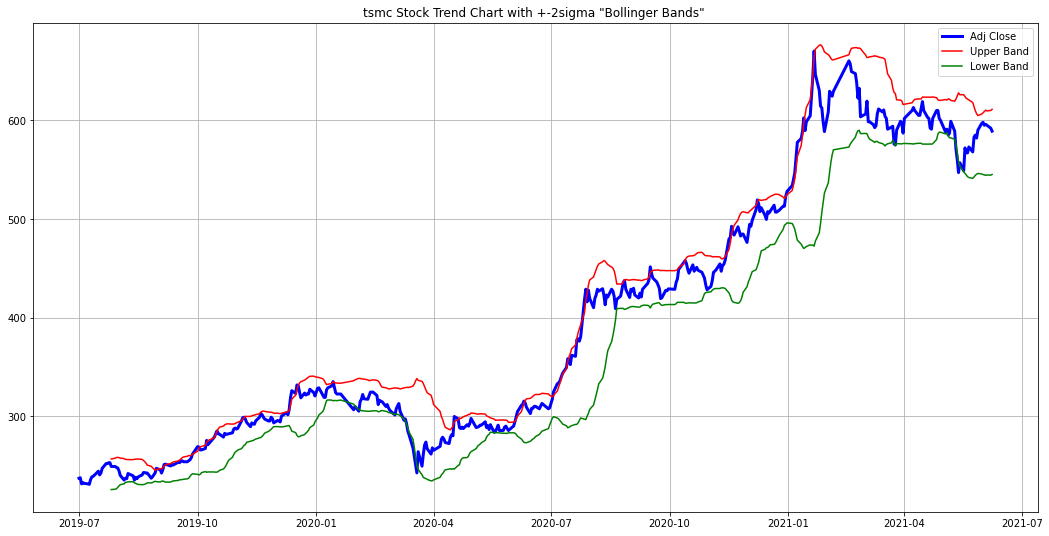

In [7]:
#tsmc Stock Trend Chart with +-2sigma "Bollinger Bands
%matplotlib inline

plt.figure(figsize=(18,9))# Change the size of plots
plt.plot( tsmc["Adj Close"], color='blue' ,linewidth=3 ,label="Adj Close"  )
plt.plot( tsmc["UBBand"], color='red',label="Upper Band"   )
plt.plot( tsmc["LBBand"], color='green' ,label="Lower Band"  )
plt.title('tsmc Stock Trend Chart with +-2sigma "Bollinger Bands" ')
plt.legend(loc='upper right')
plt.grid()
plt.show()


In [8]:
tsmc.shape

tsmc[-15:]



,High,Low,Open,Close,Volume,Adj Close,5d,20d,60d,LBBand,UBBand
Date,,,,,,,,,,,
2021-05-19,572.0,565.0,571.0,567.0,28908777.0,567.0,558.4,583.45,599.36,544.55,622.35
2021-05-20,571.0,560.0,567.0,567.0,29709287.0,567.0,562.4,582.20,597.85,542.84,621.56
2021-05-21,577.0,568.0,572.0,573.0,27376731.0,573.0,565.6,581.30,596.58,541.98,620.62
2021-05-24,572.0,566.0,570.0,568.0,15629736.0,568.0,569.4,579.60,595.26,541.12,618.08
2021-05-25,584.0,573.0,576.0,583.0,33039911.0,583.0,571.6,578.25,594.34,542.45,614.05
2021-05-26,588.0,581.0,587.0,585.0,18703987.0,585.0,575.2,577.00,593.71,544.26,609.74
2021-05-27,582.0,573.0,580.0,582.0,62169719.0,582.0,578.2,576.00,592.87,545.30,606.70
2021-05-28,592.0,582.0,587.0,590.0,29086873.0,590.0,581.6,575.50,592.65,546.16,604.84
2021-05-31,597.0,590.0,595.0,597.0,30657474.0,597.0,587.4,575.95,592.49,545.55,606.35


In [9]:
import pandas as pd
tsmc.to_csv('2330Ytoday.csv')

In [10]:
tsmc.loc[start:end,:]

,High,Low,Open,Close,Volume,Adj Close,5d,20d,60d,LBBand,UBBand
Date,,,,,,,,,,,
2019-07-01,250.0,245.0,245.5,248.5,66307875.0,237.117493,NaN,NaN,NaN,NaN,NaN
2019-07-02,250.0,247.5,249.5,249.0,24181202.0,237.594574,NaN,NaN,NaN,NaN,NaN
2019-07-03,245.0,242.0,244.0,242.5,29449774.0,231.392288,NaN,NaN,NaN,NaN,NaN
2019-07-04,245.0,242.5,244.5,244.0,17481240.0,232.823593,NaN,NaN,NaN,NaN,NaN
2019-07-05,245.0,241.5,244.5,243.0,22867074.0,231.869400,234.16,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-02,600.0,593.0,600.0,595.0,21872755.0,595.000000,592.40,576.80,592.07,544.62,608.98
2021-06-03,600.0,596.0,600.0,596.0,21077164.0,596.000000,595.20,577.25,592.03,544.23,610.27
2021-06-04,595.0,590.0,591.0,595.0,15756180.0,595.000000,596.20,577.05,592.02,544.55,609.55


In [12]:
# 轉成list
sequence = tsmc["Adj Close"].to_list()
# sequence

# X 為前十日收盤價 y 為今日收盤價 
X --> Xd-10,Xd-9,Xd-8,Xd-7,Xd-6,Xd-5,Xd-4,Xd-3,Xd-2,Xd-1 
/n
y-->today

In [13]:
# split a univariate sequence into samples
from numpy import array

def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

#第1~10 天的資料當作特徵 第11天的資料當作 label
n_steps = 10
X, y = split_sequence(sequence, n_steps)
top = 10
for i in zip(X[:top], y[:top]):
    print(i)

(array([237.11749268, 237.59457397, 231.39228821, 232.82359314,
       231.86940002, 231.39228821, 230.91520691, 235.68615723,
       238.54875183, 239.02584839]), 242.84263610839844)
(array([237.59457397, 231.39228821, 232.82359314, 231.86940002,
       231.39228821, 230.91520691, 235.68615723, 238.54875183,
       239.02584839, 242.84263611]), 244.27392578125)
(array([231.39228821, 232.82359314, 231.86940002, 231.39228821,
       230.91520691, 235.68615723, 238.54875183, 239.02584839,
       242.84263611, 244.27392578]), 240.4571533203125)
(array([232.82359314, 231.86940002, 231.39228821, 230.91520691,
       235.68615723, 238.54875183, 239.02584839, 242.84263611,
       244.27392578, 240.45715332]), 242.3655548095703)
(array([231.86940002, 231.39228821, 230.91520691, 235.68615723,
       238.54875183, 239.02584839, 242.84263611, 244.27392578,
       240.45715332, 242.36555481]), 247.1365203857422)
(array([231.39228821, 230.91520691, 235.68615723, 238.54875183,
       239.02584839, 2

In [14]:
X.shape, y.shape

((460, 10), (460,))

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
n_features = 1
# define model 
# 不做 SimpleRNN
# LSTM
# Bidirectional LSTM
# １　hidden layer 256神經元 , input_shape=(10,1)

model = Sequential()
model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(Bidirectional(LSTM(600, activation='relu')))
model.add(Dense(1))
# model.add(LSTM(256, input_shape=(n_steps, n_features),unroll=False))
# model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 256)           264192    
_________________________________________________________________
bidirectional (Bidirectional (None, 1200)              4113600   
_________________________________________________________________
dense (Dense)                (None, 1)                 1201      
Total params: 4,378,993
Trainable params: 4,378,993
Non-trainable params: 0
_________________________________________________________________


In [16]:
# fit# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X.shape)

(460, 10, 1)


In [17]:
#分拆 train , test
split=0.8
split_boundary = int(X.shape[0]*split)
train_x = X[:split_boundary ] # 前80% 當作 train 的特徵
test_x = X[split_boundary: ] # 後20% 當作 test 的特徵
train_y = y[:split_boundary ] # 前80% 當作 train 的 label
test_y = y[split_boundary: ] # 後20% 當作 test 的 label

In [18]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((368, 10, 1), (92, 10, 1), (368,), (92,))

In [34]:
#loss function is mean square error　／mean_absolute_error
model.compile(optimizer='adam', loss='mse',metrics=['RootMeanSquaredError'])#有開根號

In [42]:
# fit model batch_size=10可以不用 因為有test_x,test_y
history = model.fit(train_x, train_y, batch_size=10, epochs=20, validation_split=0.1, verbose=1)
# history = model.fit(train_x, train_y, batch_size=10, validation_data=(test_x,test_y), verbose=1)

Epoch 1/20
34/34 [==============================] - 6s 190ms/step - loss: 68.2028 - root_mean_squared_error: 8.2585 - val_loss: 239.2168 - val_root_mean_squared_error: 15.4666
Epoch 2/20
34/34 [==============================] - 6s 190ms/step - loss: 89.9159 - root_mean_squared_error: 9.4824 - val_loss: 749.0803 - val_root_mean_squared_error: 27.3693
Epoch 3/20
34/34 [==============================] - 6s 185ms/step - loss: 149.7750 - root_mean_squared_error: 12.2383 - val_loss: 252.1382 - val_root_mean_squared_error: 15.8789
Epoch 4/20
34/34 [==============================] - 6s 188ms/step - loss: 81.8927 - root_mean_squared_error: 9.0495 - val_loss: 62.6324 - val_root_mean_squared_error: 7.9141
Epoch 5/20
34/34 [==============================] - 7s 194ms/step - loss: 45.6708 - root_mean_squared_error: 6.7580 - val_loss: 130.5151 - val_root_mean_squared_error: 11.4243 - root_mean_squared_error: 6.36 - ETA: 1s - loss: 40.4259 - root_mean_squared_error - ETA: 0s - loss: 45.9930 - root_mea

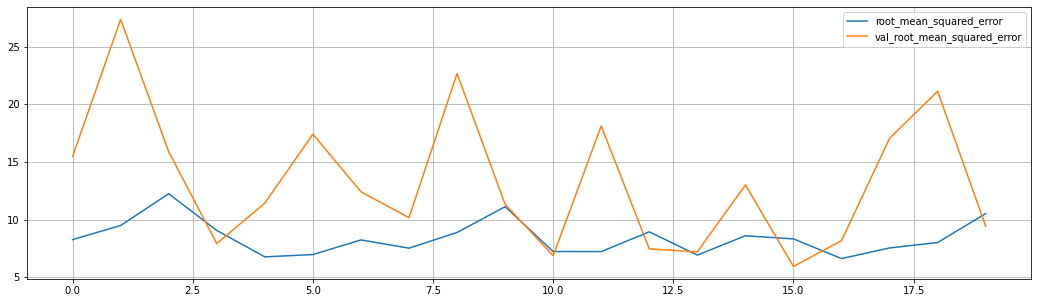

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(18,5))
plt.plot(range(len(history.history['root_mean_squared_error'])), history.history['root_mean_squared_error'],label="root_mean_squared_error"   )
plt.plot(range(len(history.history['val_root_mean_squared_error'])), history.history['val_root_mean_squared_error'],label="val_root_mean_squared_error"   )
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [47]:
# test dataset 92筆預測
y_pred = model.predict(test_x)

In [48]:
import pandas as pd
table = pd.DataFrame(y_pred,columns=['y_pred'])
table['test_y'] = pd.DataFrame(test_y) 
table

,y_pred,test_y
0,581.484131,602.532593
1,597.791138,589.585632
2,576.116272,598.548950
3,588.224548,604.524475
4,593.382202,624.442871
...,...,...
87,587.768127,598.000000
88,587.674133,595.000000
89,585.445068,596.000000
90,587.241089,595.000000


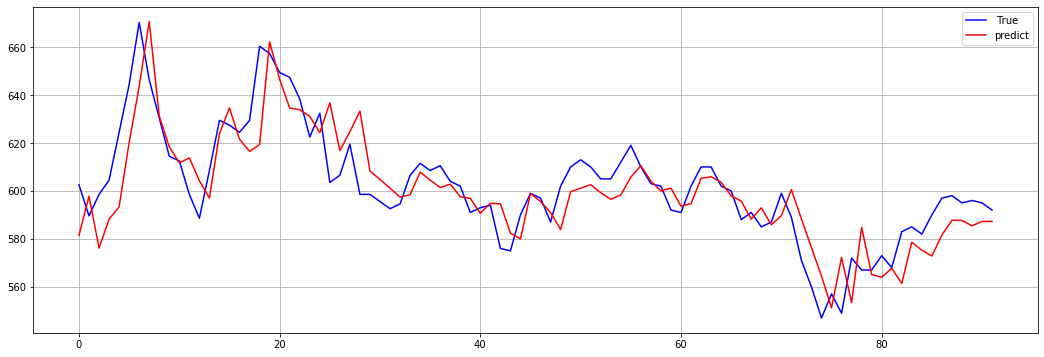

In [49]:
plt.figure(figsize=(18,6))

plt.plot(test_y, color='blue' ,label=" True "     )
plt.plot(y_pred, color='red' ,label="predict"     )
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [50]:
X[-1],y_pred[-1]

(array([[568.],
        [583.],
        [585.],
        [582.],
        [590.],
        [597.],
        [598.],
        [595.],
        [596.],
        [595.]]),
 array([587.313], dtype=float32))

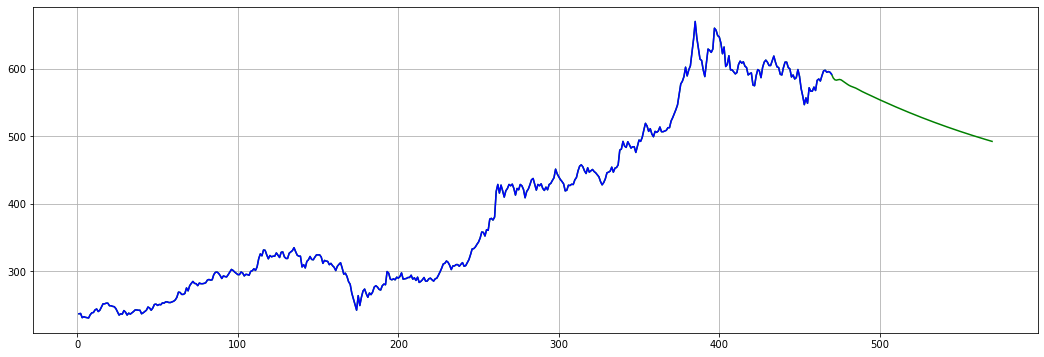

In [51]:
#predict next 100 timesplot
#[... 012345678910111213 14 15 16]
import numpy as np
import matplotlib.pyplot as plt
next_time = 100
hist = sequence[-1 * n_steps:]
X_test = array(hist).reshape(-1, n_steps)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

pred = sequence.copy()

for i in range(next_time):
    nx = model.predict(X_test)[0][0]
    pred.append(nx)    
    data = pred[-1 * n_steps:]
    X_test = array(data).reshape(-1, n_steps).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

plt.figure(figsize=(18,6))    
plt.plot(range(1, 1+len(pred)), pred, color='green')    
plt.plot(range(1, 1+len(sequence)), sequence, color='blue') 
plt.grid()
plt.show()